In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(columns=["rho_0","alpha_0", "rho_1", "alpha_1", "h0"])

for redshift_birth in np.arange(0,35,1):
    df.loc[redshift_birth] = calculate_density_parameters(redshift_birth)
r4d = 14/(1+df.index)
df["redshift_birth"]=df.index
df["r4d"]=r4d


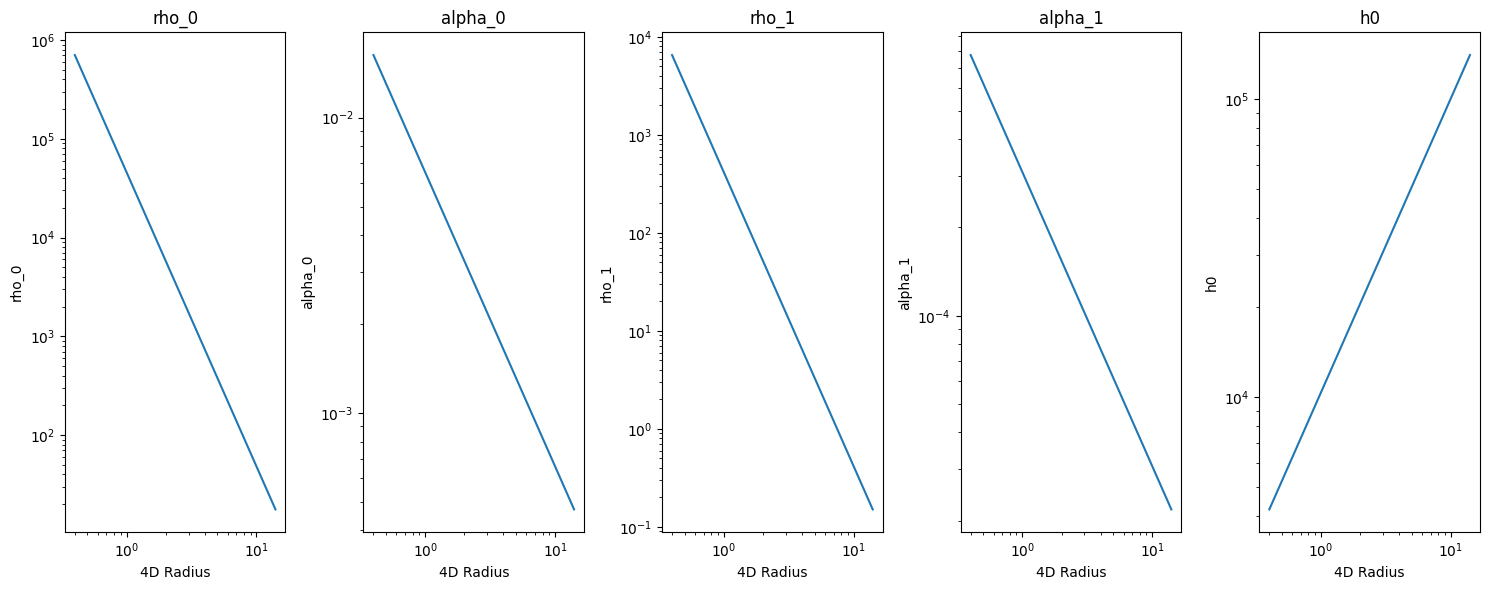

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(15, 6))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each column versus redshift_birth
for i, column in enumerate(["rho_0","alpha_0", "rho_1", "alpha_1", "h0"]):
    axs[i].plot(df["r4d"], df[column])
    axs[i].set_xlabel("4D Radius")
    axs[i].set_ylabel(column)
    axs[i].set_title(column)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()

In [6]:
# Assuming you have the DataFrame df with the required columns

# Calculate log(r4d) column
df['log_r4d'] = np.log10(14 / (1 + df['redshift_birth']))

# Define the degree of the polynomial fit
degree = 1

# Create an empty dictionary to store the fitting coefficients
fitting_coeffs = {}

# Loop over the columns to calculate the fitting coefficients
for column in ['rho_0', 'alpha_0', 'rho_1', 'alpha_1', 'h0']:
    # Calculate log(column) column
    df['log_' + column] = np.log10(df[column])

    # Perform the polynomial fit using numpy.polyfit
    fit_coeffs = np.polyfit(df['log_r4d'], df['log_' + column], degree)

    # Store the fitting coefficients in the dictionary
    fitting_coeffs[column] = fit_coeffs

# Print the fitting coefficients
for column, coeffs in fitting_coeffs.items():
    print(f'Fitting coefficients for log({column}) versus log(r4d):')
    print('Slope:', coeffs[0])
    print('Intercept:', coeffs[1])
    print()


Fitting coefficients for log(rho_0) versus log(r4d):
Slope: -2.979137077034973
Intercept: 4.662143895661162

Fitting coefficients for log(alpha_0) versus log(r4d):
Slope: -0.9962401859242193
Intercept: -2.1847012765207023

Fitting coefficients for log(rho_1) versus log(r4d):
Slope: -3.003871067157709
Intercept: 2.619664468399843

Fitting coefficients for log(alpha_1) versus log(r4d):
Slope: -1.0037795630256452
Intercept: -3.510177916755981

Fitting coefficients for log(h0) versus log(r4d):
Slope: 0.9868817849104307
Intercept: 4.016252574205797



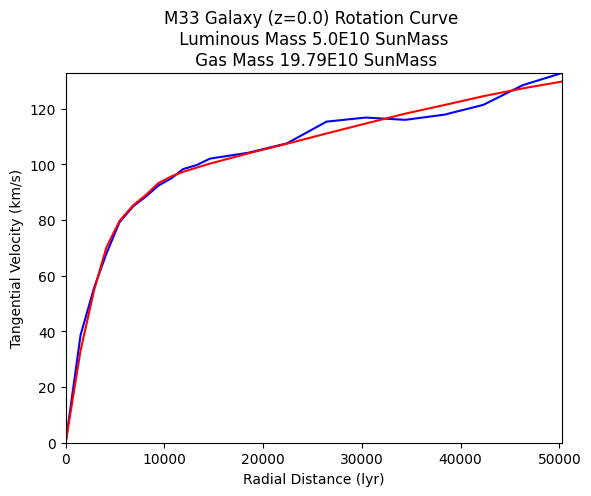

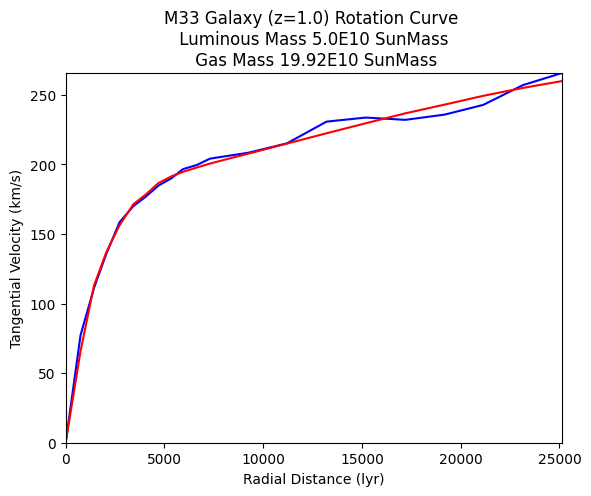

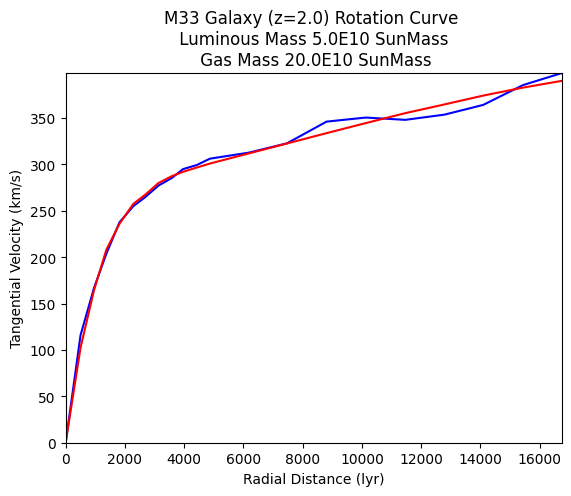

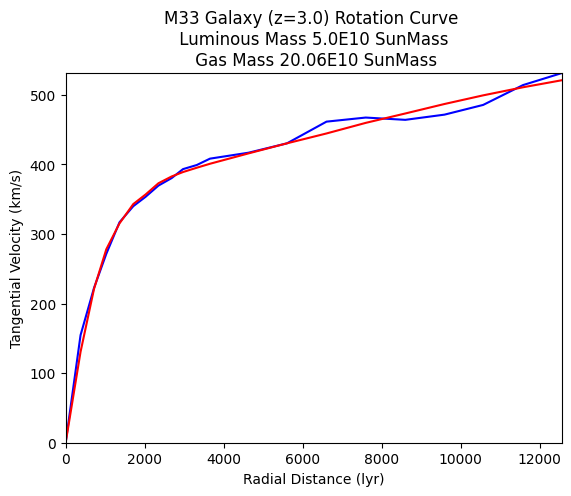

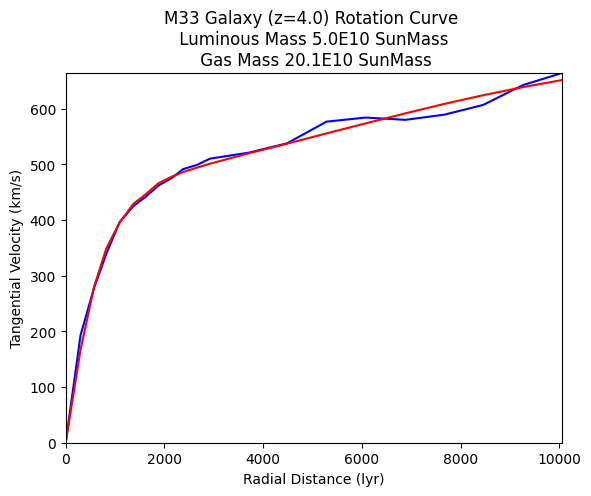

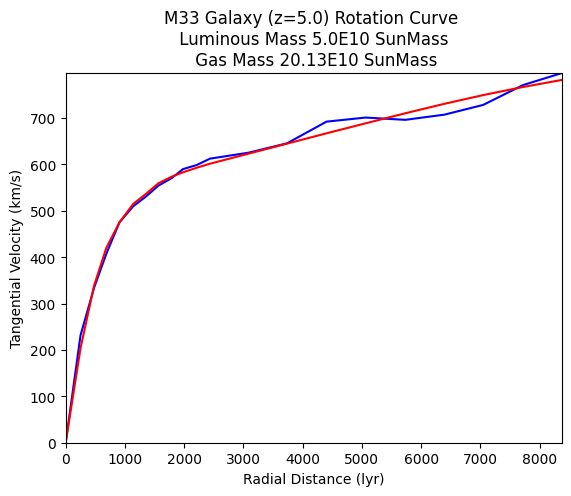

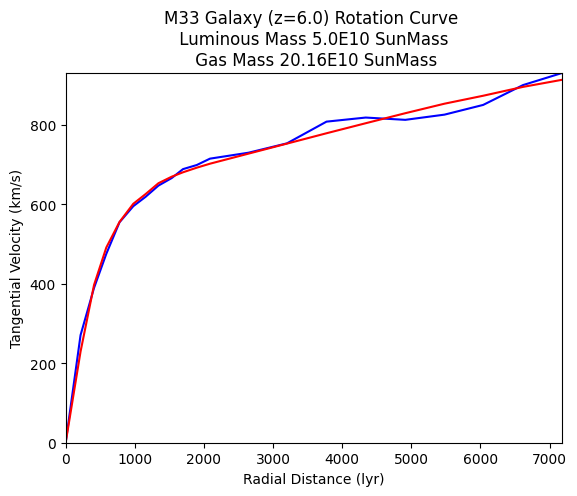

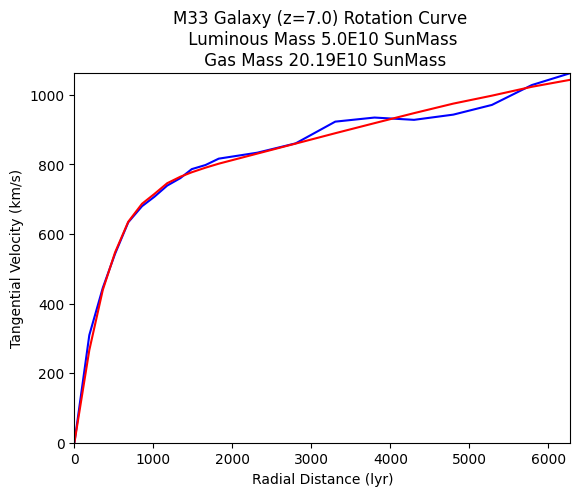

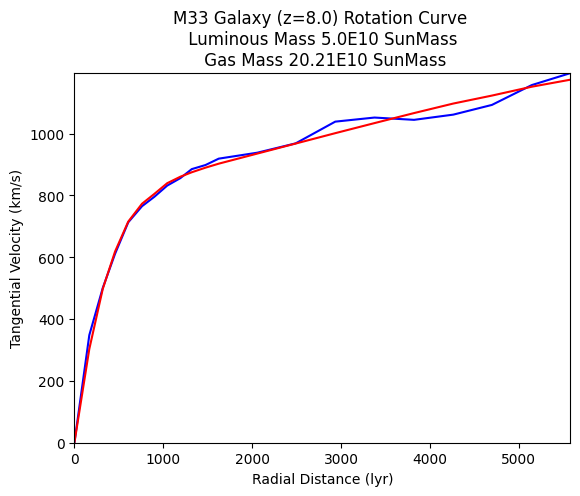

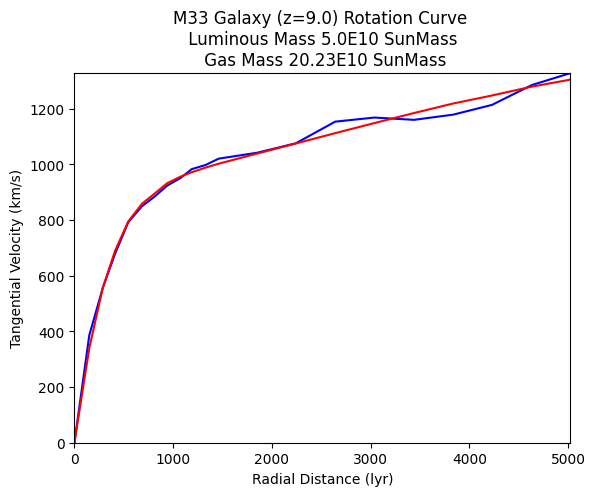

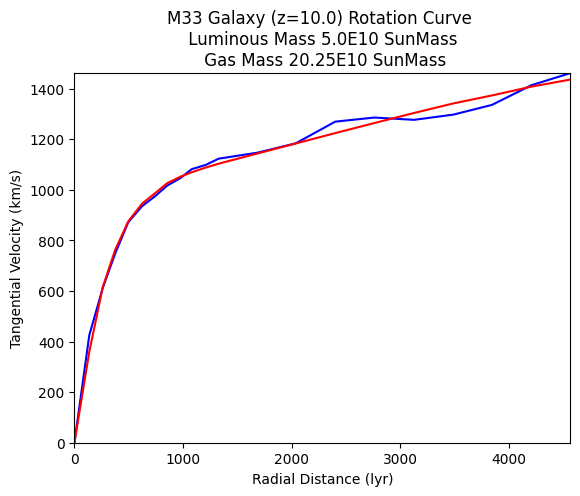

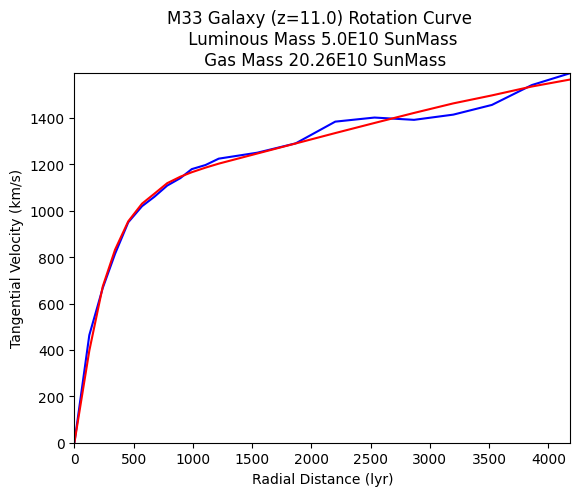

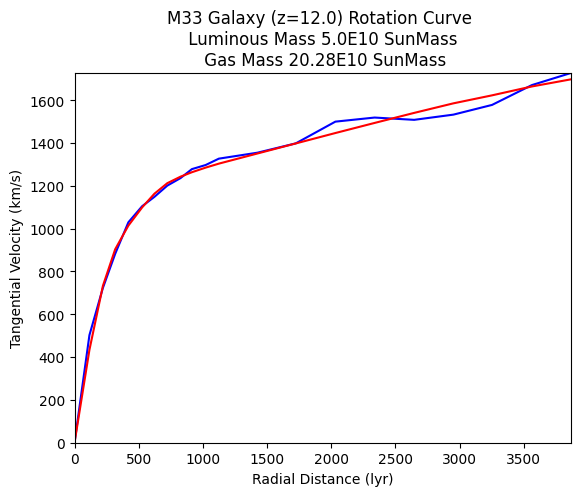

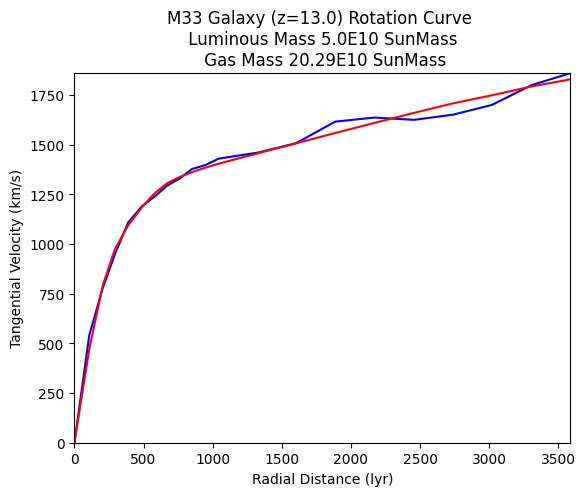

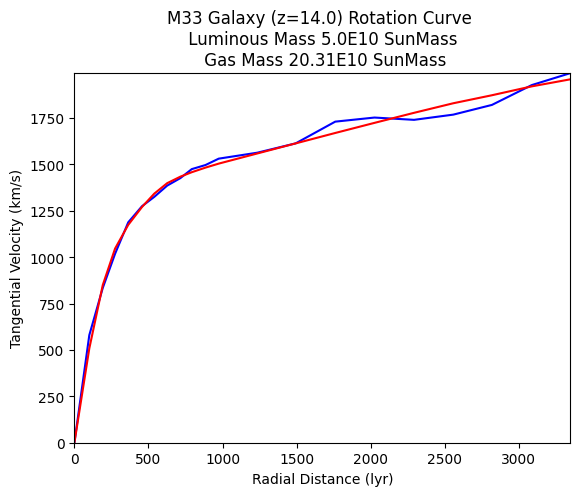

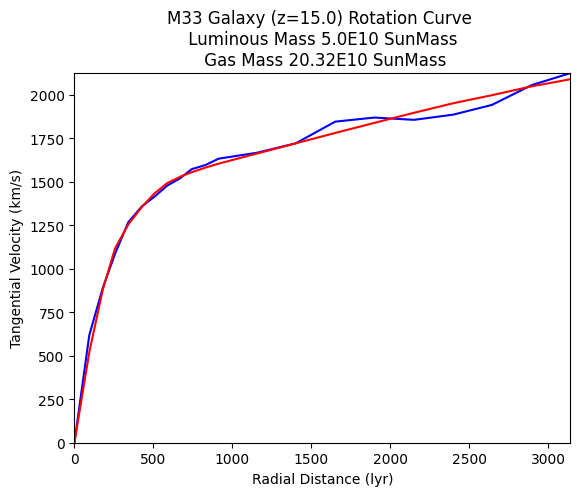

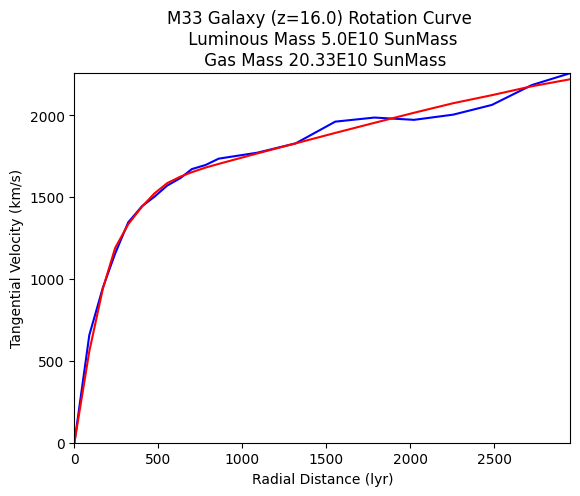

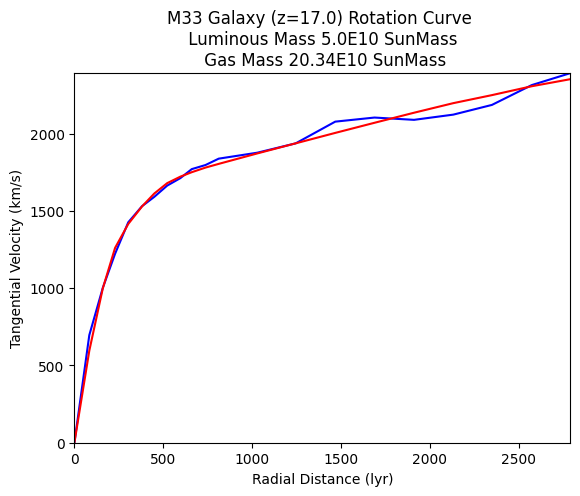

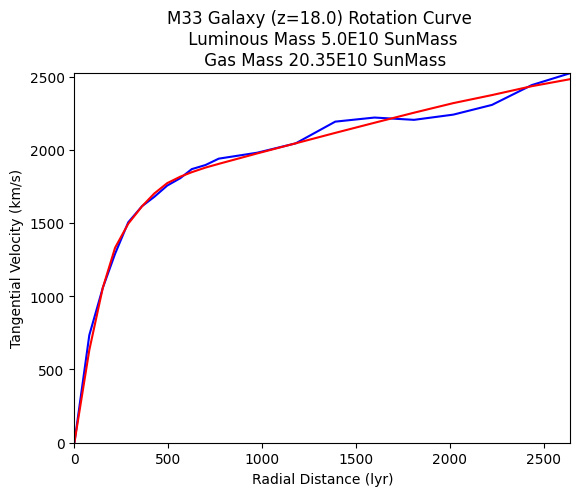

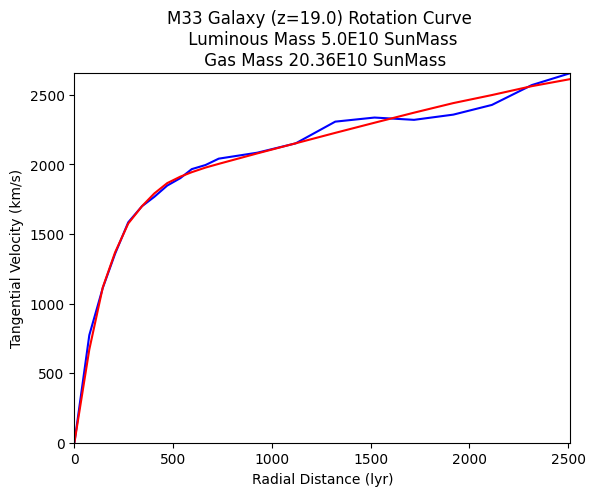

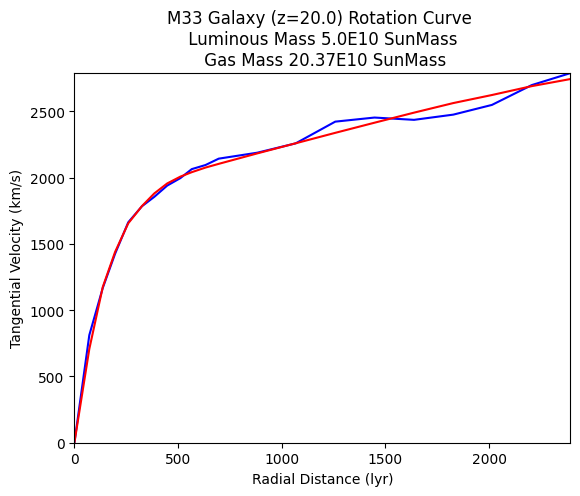

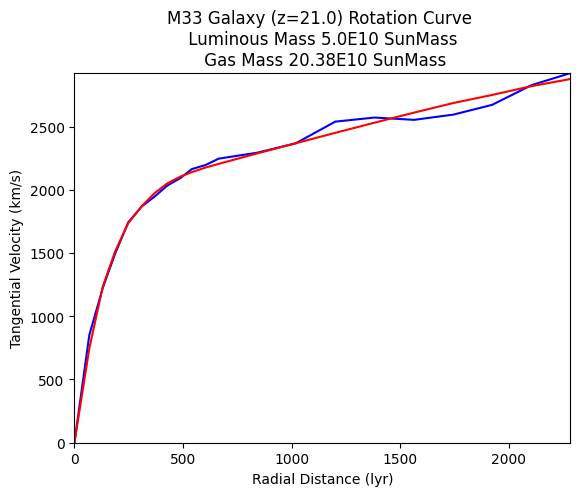

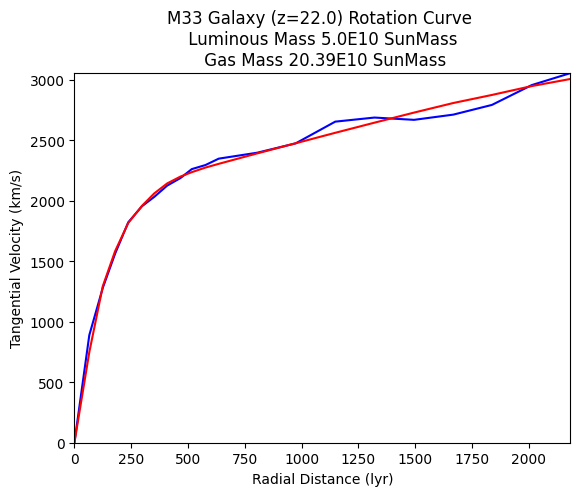

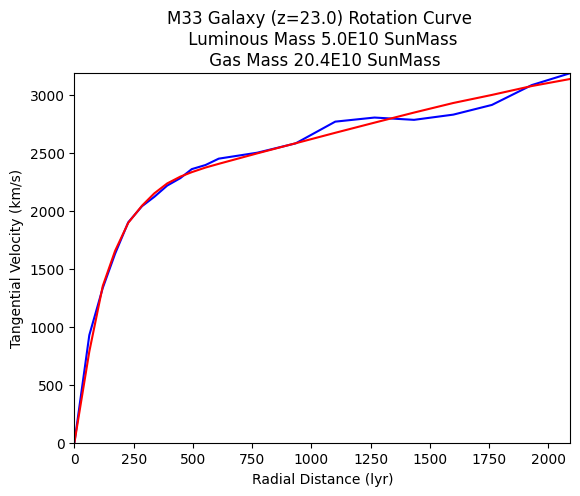

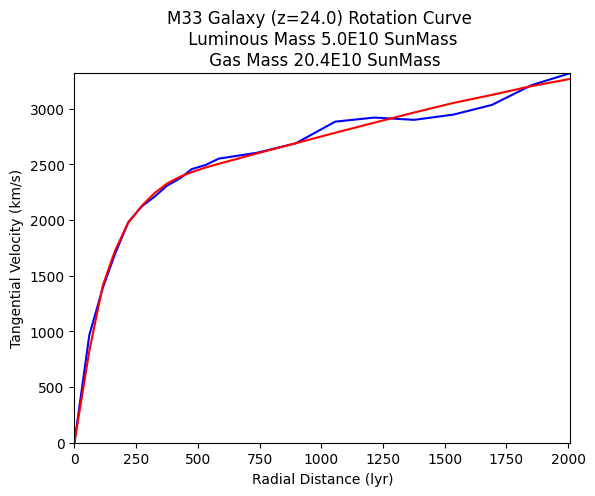

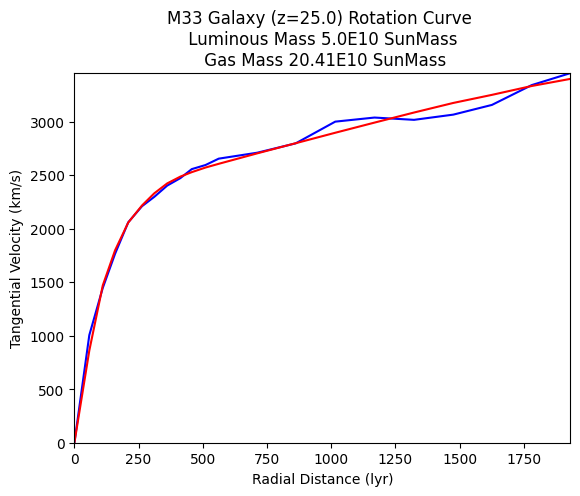

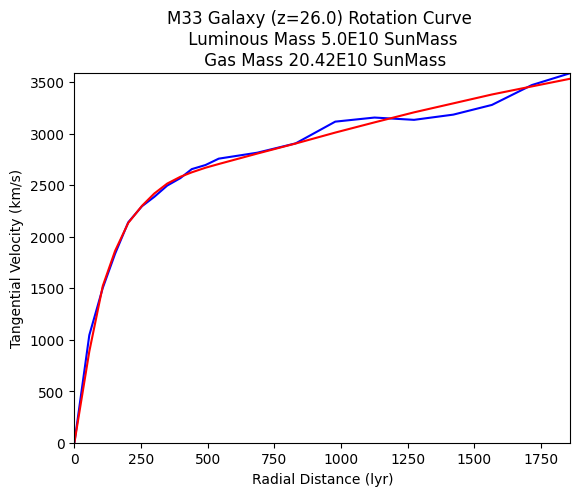

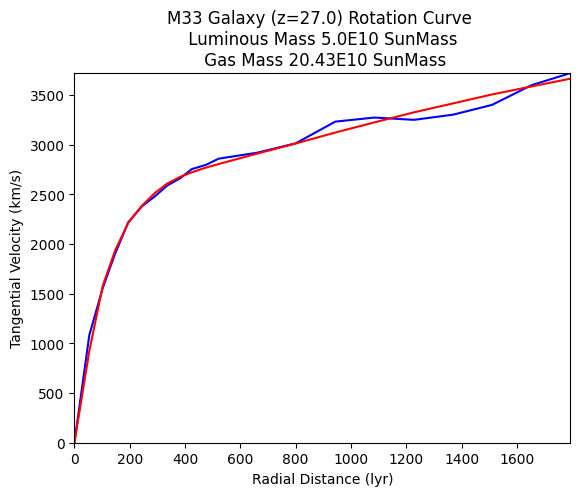

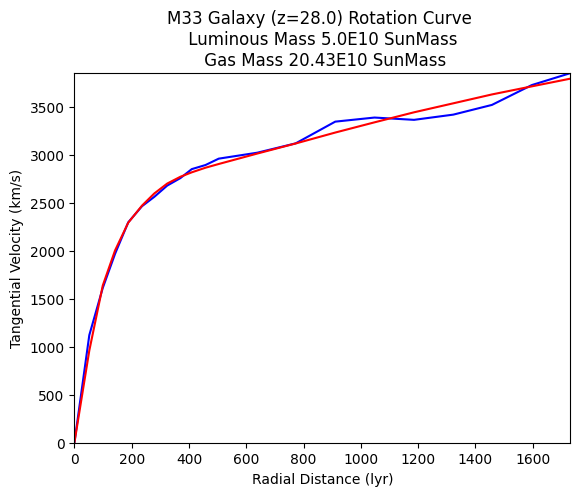

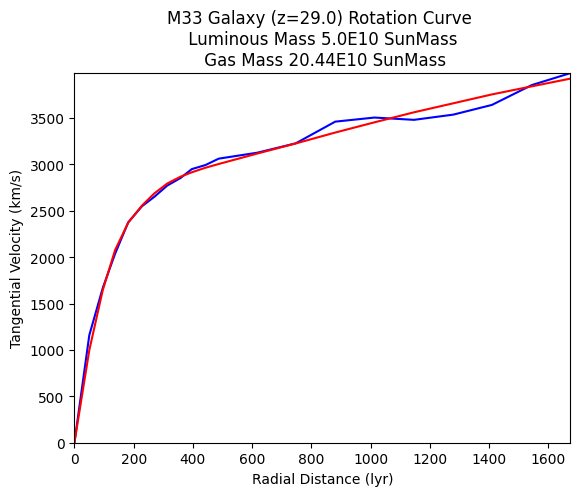

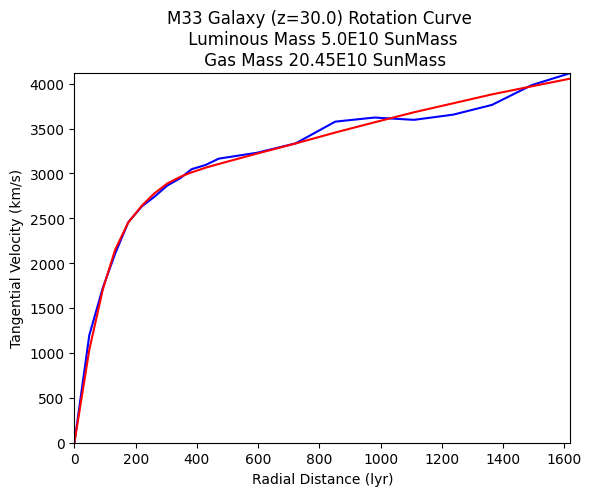

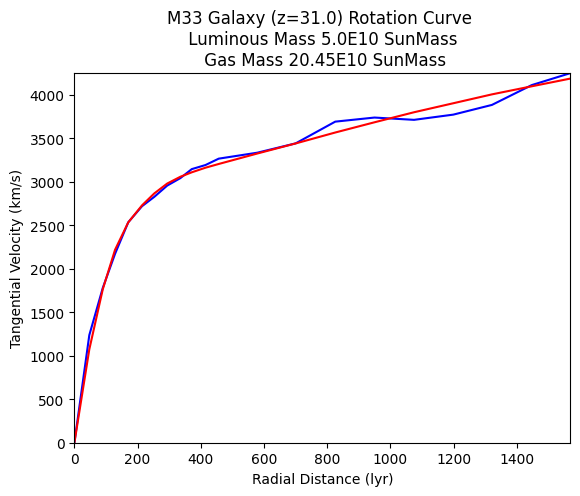

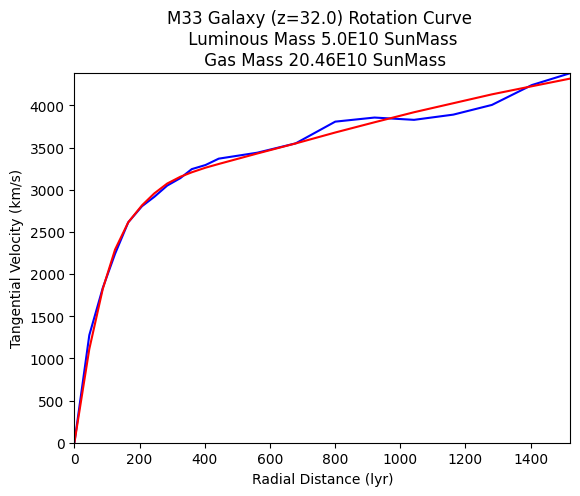

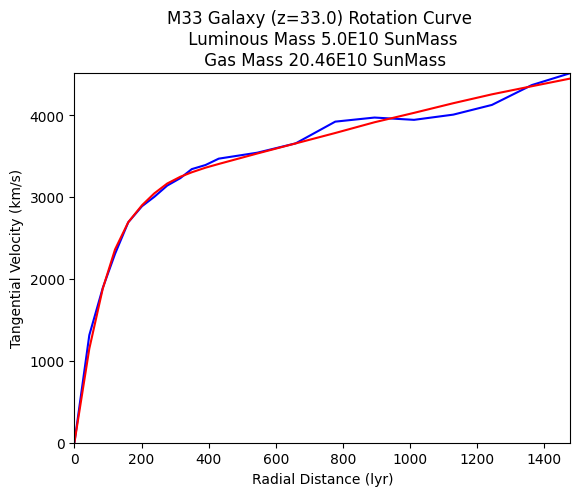

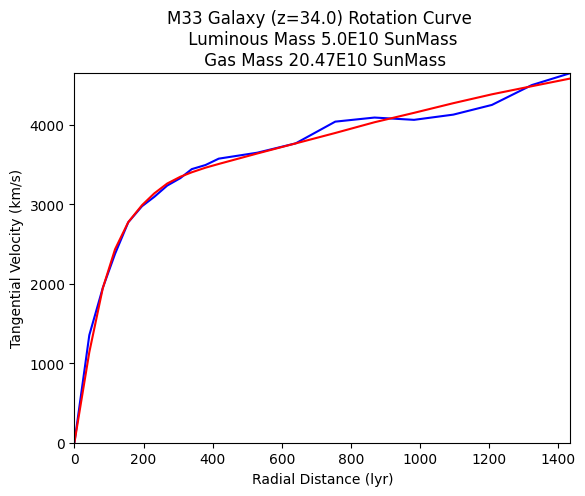

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hugalaxy import GalaxyWrapper, calculate_mass, plotRotationCurve, density_wrapper, calculate_rotational_velocity
from hugalaxy import  move_rotation_curve, calculate_density_parameters
from timeit import default_timer as timer

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

def plotRotationCurve(M33):
    v_sim = np.array(M33.print_simulated_curve())
    m33_rotational_curve = M33.rotation_curve.T
    plt.plot(m33_rotational_curve[:,0], m33_rotational_curve[:,1], color="blue" )
    plt.plot(v_sim[:,0], v_sim[:,1], color="red" )
    plt.xlabel("Radial Distance (lyr)")
    plt.ylabel("Tangential Velocity (km/s)")
    myMass = np.round(calculate_mass(M33.rho_0, M33.alpha_0, M33.h0)/1E10,2)
    gasMass = np.round(calculate_mass(M33.rho_1, M33.alpha_1, M33.h0)/1E10,2)
    plt.title("M33 Galaxy (z={}) Rotation Curve \n Luminous Mass {}E10 SunMass \n Gas Mass {}E10 SunMass".format(M33.redshift, myMass, gasMass))
    plt.xlim(0,np.max(m33_rotational_curve[:,0]))
    plt.ylim(0,np.max(m33_rotational_curve[:,1]))
    plt.show()

   
    
M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)
nr = 300
nz = 100
ntheta = 180
nr_sampling = 103
nz_sampling = 104
R_max = 50000.0
rho_0, alpha_0, rho_1, alpha_1, h0 = calculate_density_parameters(0.0)
GalaxyMass = 5E10
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, nr_sampling, nz_sampling, ntheta, redshift,GPU_ID=0, cuda=True)



# df = pd.DataFrame(columns=["rho_0","alpha_0", "rho_1", "alpha_1", "h0"])

# for redshift_birth in np.arange(0,35,1):
#     r4d = 14/(1+redshift_birth)
#     M33.redshift=redshift_birth
#     M33.rho_0, M33.alpha_0, M33.rho_1, M33.alpha_1, M33.h0 = calculate_density_parameters(redshift_birth)
#     new_rotation_curve = move_rotation_curve(m33_rotational_curve, redshift, redshift_birth )
#     M33.read_galaxy_rotation_curve(new_rotation_curve)
#     values = M33.move_galaxy(True)
#     df.loc[redshift_birth] = values
# r4d = 14/(1+df.index)
# df["redshift_birth"]=df.index
# df["r4d"]=r4d



for redshift_birth in np.arange(0,35,1):
    r4d = 14/(1+redshift_birth)
    M33.redshift=redshift_birth
    M33.rho_0, M33.alpha_0, M33.rho_1, M33.alpha_1, M33.h0 = calculate_density_parameters(redshift_birth)
    new_rotation_curve = move_rotation_curve(m33_rotational_curve, redshift, redshift_birth )
    M33.read_galaxy_rotation_curve(new_rotation_curve)
    values = M33.move_galaxy()
    plotRotationCurve(M33)
    


In [ ]:
epoch=100E6
time_step_years = 10E6
eta = 1/100
temperature =7
for i in np.arange(11):
    current_masses = M33.DrudePropagator( redshift,  time_step_years,  eta,  temperature)
    epoch += time_step_years


In [ ]:
from hugalaxy.plotting import move_rotation_curve

In [7]:
M33.redshift

34.0